In [1]:
import cv2
from matplotlib import pyplot as plt
import tensorflow as tf
#from tensorflow import keras
#Используем костыль для исправления IntelliSense для keras по гайду:
#https://stackoverflow.com/questions/71000250/import-tensorflow-keras-could-not-be-resolved-after-upgrading-to-tensorflow-2
import keras.api._v2.keras as keras
from keras import layers
from keras import losses
#from keras.datasets import CIFAR100
import numpy as np
import tensorflow_datasets as tfds

C:\Users\PlayerPC\Miniconda3\envs\tf\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

num_classes=10
input_shape = (32, 32, 3)

x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
#x_train_l, y_train_l = extract_training_samples('letters')

print()


print("Train X=%s, y=%s"%(x_train.shape,y_train.shape))
#print("Train Letters X=%s, y=%s"%(x_train_l.shape,y_train_l.shape))
#print("Test X=%s, y=%s"%(x_test1.shape,y_test.shape))



print("Train X=%s, y=%s"%(x_train.shape,y_train.shape))
print("Test X=%s, y=%s"%(x_test.shape,y_test.shape))
print(x_test[0].shape)




Train X=(50000, 32, 32, 3, 1), y=(50000, 10)
Train X=(50000, 32, 32, 3, 1), y=(50000, 10)
Test X=(10000, 32, 32, 3, 1), y=(10000, 10)
(32, 32, 3, 1)


In [3]:
from keras.layers import Convolution2D, Input

def define_skip_model():
    inputs = keras.Input(shape=input_shape, name="img")
    x = layers.BatchNormalization()(inputs)
    #x = layers.Dropout(0.2)(x)
    x = layers.Conv2D(128, 3, activation="relu")(x)
    x = layers.Conv2D(128, 3, activation="relu")(x)
    x = layers.BatchNormalization()(x)
    #x = layers.Dropout(0.2)(x)
    block_1_output = layers.MaxPooling2D(3)(x)
    #block_1_output = layers.BatchNormalization()(block_1_output)
    
    x = layers.Conv2D(128, 3, activation="relu", padding="same")(block_1_output)
    x = layers.Conv2D(128, 3, activation="relu", padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.2)(x)
    block_2_output = layers.concatenate([x, block_1_output])
    
    #block_2_output = layers.BatchNormalization()(block_2_output)
    x = layers.Conv2D(128, 3, activation="relu")(block_2_output)
    x = layers.GlobalAveragePooling2D()(x)
    #x = layers.Dense(256, activation="relu")(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)
    model = keras.Model(inputs, outputs, name="toy_resnet")
    return model
model=define_skip_model()

In [4]:
model.load_weights("ready.h5")

In [118]:
model.compile(
    loss=losses.CategoricalCrossentropy(),
    optimizer=tf.optimizers.Adam(lr=0.01),
    metrics=['accuracy']
)

In [119]:
model.fit(x_train,y_train,batch_size=500,epochs=10,shuffle=True,validation_data=(x_test,y_test))#

Epoch 1/10
100/100 [==============================] - 20s 152ms/step - loss: 2.0718 - accuracy: 0.2907 - val_loss: 2.1148 - val_accuracy: 0.2561
Epoch 2/10
100/100 [==============================] - 15s 153ms/step - loss: 1.5601 - accuracy: 0.4225 - val_loss: 2.2897 - val_accuracy: 0.2479
Epoch 3/10
100/100 [==============================] - 15s 155ms/step - loss: 1.3512 - accuracy: 0.5136 - val_loss: 1.9127 - val_accuracy: 0.3545
Epoch 4/10
100/100 [==============================] - 15s 150ms/step - loss: 1.1681 - accuracy: 0.5863 - val_loss: 1.5006 - val_accuracy: 0.4865
Epoch 5/10
100/100 [==============================] - 15s 149ms/step - loss: 1.0267 - accuracy: 0.6385 - val_loss: 0.9902 - val_accuracy: 0.6491
Epoch 6/10
100/100 [==============================] - 15s 148ms/step - loss: 0.9095 - accuracy: 0.6819 - val_loss: 0.9401 - val_accuracy: 0.6770
Epoch 7/10
100/100 [==============================] - 15s 149ms/step - loss: 0.8328 - accuracy: 0.7094 - val_loss: 0.8707 - val_ac

In [5]:
model.compile(
    loss=losses.CategoricalCrossentropy(),
    optimizer=tf.optimizers.Adam(lr=0.001),
    metrics=['accuracy']
)

C:\Users\PlayerPC\Miniconda3\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [6]:
model.fit(x_train,y_train,batch_size=500,epochs=5,shuffle=True,validation_data=(x_test,y_test))#

Epoch 1/5
100/100 [==============================] - 24s 145ms/step - loss: 0.5222 - accuracy: 0.8173 - val_loss: 0.5683 - val_accuracy: 0.8058
Epoch 2/5
100/100 [==============================] - 14s 141ms/step - loss: 0.4706 - accuracy: 0.8348 - val_loss: 0.5625 - val_accuracy: 0.8078
Epoch 3/5
100/100 [==============================] - 14s 141ms/step - loss: 0.4456 - accuracy: 0.8434 - val_loss: 0.5671 - val_accuracy: 0.8086
Epoch 4/5
100/100 [==============================] - 14s 141ms/step - loss: 0.4240 - accuracy: 0.8506 - val_loss: 0.5500 - val_accuracy: 0.8119
Epoch 5/5
100/100 [==============================] - 14s 141ms/step - loss: 0.4115 - accuracy: 0.8558 - val_loss: 0.5515 - val_accuracy: 0.8156


In [7]:
model.save("ready.h5")

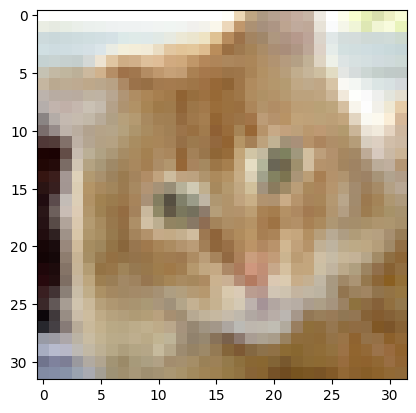

(1, 32, 32, 3)
1/1 [==============================] - 0s 20ms/step
3 3


In [16]:
#model.evaluate(x_test,y_test)
id=np.random.randint(0,x_test.shape[0])
im = x_test[id]



im=im.astype('float32')/255.0
im=im.reshape((1,32,32,3))

from matplotlib import pyplot as plt
plt.imshow((im*255.0).reshape((32,32,3)), interpolation='nearest')
plt.show()


print(im.shape)
#print(model.predict(x_test,batch_size=1).argmax())
print(model.predict(im,batch_size=1).argmax(),y_test[id].argmax())
#print(y_test[id])